DEXINUS    57
dtype: int64
DEXINUS    0
dtype: int64


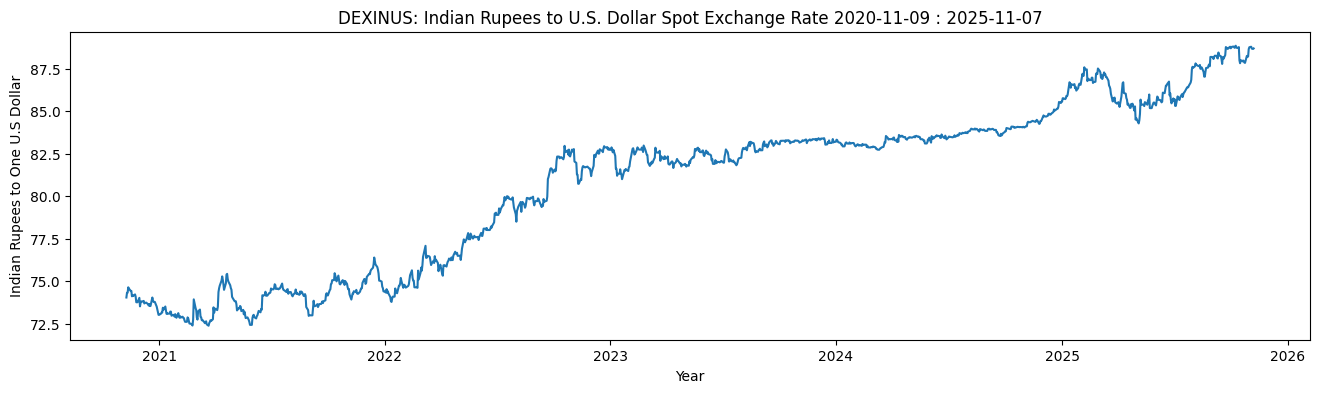

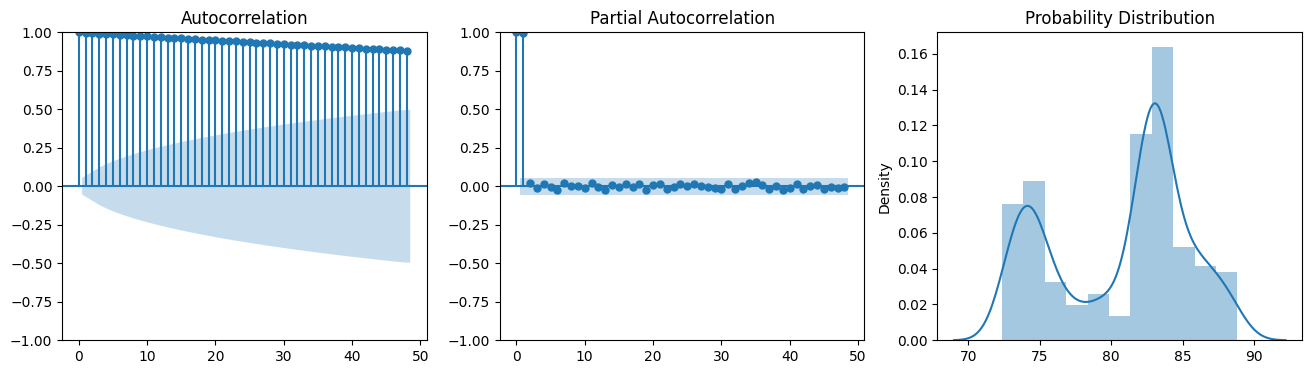

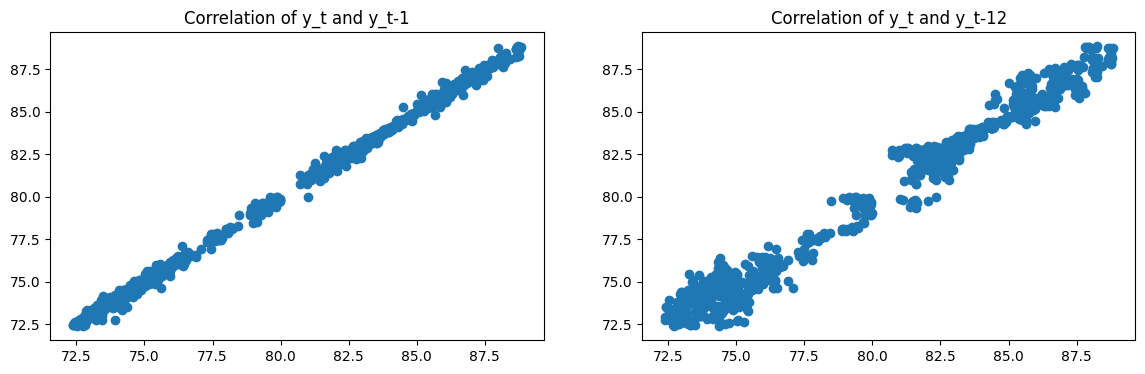

Time series data is not stationary. Adfuller test pvalue=0.8940273042064009


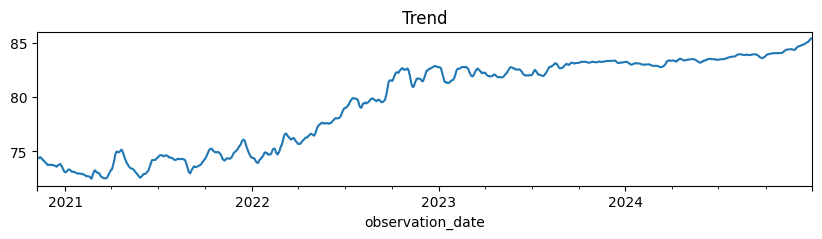

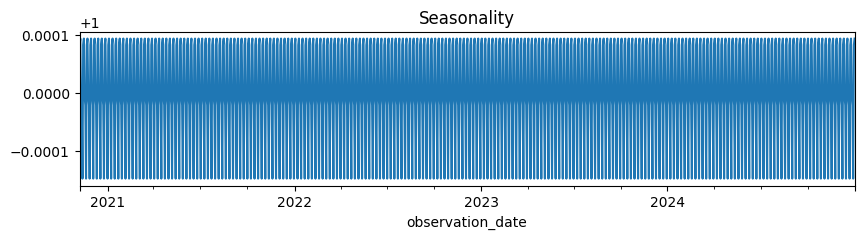

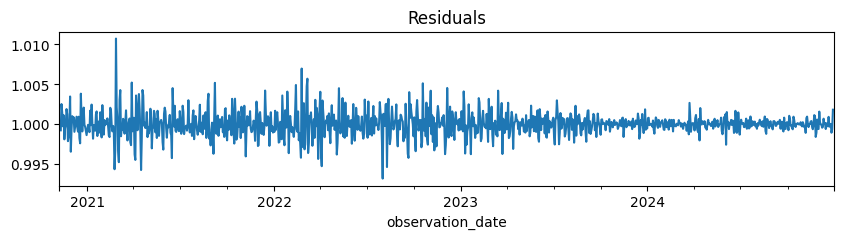

END


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

csv_location = "DEXINUS.csv"

# Load input CSV data, set ´observation_date´ col as index and convert it to datetime
df = pd.read_csv(csv_location, index_col='observation_date', parse_dates=True)

# # Lets describe and check the data and properties of dataframe
# print("Datatype for index is", type(df.index)) # wanted to confirm parse_dates=True option
# print(df.info())  # prints concise summary about DataFrame's structure
# print(df.head())  # prints first five rows - default

# Check if there is NaN entries
print(df.isna().sum()) # There are NaN entries which is expected due to Holidays and Weekends

# Fill those NaN using ffill() since On weekends/holidays the rate simply remains the last known spot rate
df['DEXINUS'] = df['DEXINUS'].ffill()
print(df.isna().sum())

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

def plot_data_properties(data, ts_plot_name="Time Series plot"):
    '''
    Summary:
    -------
    Plots various plots, including time series, autocorrelation,
    partial autocorrelation and distribution plots of data.
    
    Parameters:
    ----------
    ts_plot_name(String): The name of the time series plot
    data(pd.Dataframe, pd.Series, array): Time Series Data
    
    Returns:
    --------
    None
    
    '''
    plt.figure(figsize=(16,4))
    plt.plot(data)
    plt.title(ts_plot_name)
    plt.ylabel('Indian Rupees to One U.S Dollar')
    plt.xlabel('Year')
    fig, axes = plt.subplots(1,3,squeeze=False)
    fig.set_size_inches(16,4)
    plot_acf(data, ax=axes[0,0], lags=48)
    plot_pacf(data, ax=axes[0,1], lags=48)
    sns.distplot(data, ax=axes[0,2])
    axes[0,2].set_title("Probability Distribution")

plot_data_properties(df, 'DEXINUS: Indian Rupees to U.S. Dollar Spot Exchange Rate 2020-11-09 : 2025-11-07')

fig, axes = plt.subplots(1,2, squeeze=False)
fig.set_size_inches(14,4)
axes[0,0].scatter(x=df[1:], y=df.shift(1)[1:])
axes[0,1].scatter(x=df[12:], y=df.shift(12)[12:])
axes[0,0].set_title('Correlation of y_t and y_t-1')
axes[0,1].set_title('Correlation of y_t and y_t-12')
plt.show()

from statsmodels.tsa.stattools import adfuller
def test_stationarity(data):
    '''
    Summary:
    -------
    Performs Adfuller test on given time series data to test stationarity.
    p_val >= 0.05 means the data is not stationary, otherwise (p_val < 0.05) it is stationary.
    
    Parameters:
    data(pd.Dataframe, pd.Series. np.array): Time series data to be tested
    
    Return:
    ------
    '''
    p_val=adfuller(data['DEXINUS'])[1]
    if p_val >= 0.05:
        print("Time series data is not stationary. Adfuller test pvalue={}".format(p_val))
    else:
        print("Time series data is stationary. Adfuller test pvalue={}".format(p_val))

test_stationarity(df)


# Spilt the data to training and test data
# Training data will contain rows from the beginning of the dataset up to 2024-12-31 (inclusive)
# Test data will have all rows from 2025-01-01 to the end of the input data
training_data = df.loc[:'2024-12-31']
test_data = df.loc['2025-01-01':]

def plot_seasonal_decompose(data, model):
    '''
    Summary:
    -------
    Plots trend, seasonality and residuals with bigger plot size=(10,2)
    
    Parameters:
    ----------
    data(pd.Dataframe, pd.Series): time series data
    
    Return:
    ------
    decomposition(obj): return value of statsmodels.tsa.seasonal.seasonal_decompose
    '''
    decomposition = seasonal_decompose(data,model=model)
    decomposition.trend.plot(figsize=(10,2), title='Trend')
    plt.show()
    decomposition.seasonal.plot(figsize=(10,2), title='Seasonality')
    plt.show()
    decomposition.resid.plot(figsize=(10,2), title='Residuals')
    plt.show()
    return decomposition

decomposition = plot_seasonal_decompose(training_data, 'multiplicative')
print("END")



I tried my best to study and understand the given notebook related to analysis of time series data with Trend and Seasonal components. 

I downloaded and used the data https://fred.stlouisfed.org/series/DEXINUS related to exchaged rate for Daily Indian Rupees to U.S. Dollar Spot Exchange Rate (DEXINUS). SARIMA (Seasonal ARIMA) explicitly models seasonality, trend, and noise from the raw data. Hence the we must take input data which is NOT seasonaly adjusted. SARIMA learns and removes the seasonality internally. So I took the Non Seasonally-Adjusted version of data. 

I applied the methods which I could understand and execute it from the notebook. It started well where I could understand the data, transformed it and handled NaN entries as it must be handled in time series data. Then plot various graphs including time series, autocorrelation, partial autocorrelation and distribution plots of data to understand the data well. This helps to understand if there is any trend or seasonaility exists on the data. 

From Seasonal decomposition and Time series components I lost the track and could not understand much. I found the blog was bit complicated for someone like me who has no prior experience with time series data.
